# Exercise 1. Mining Frequent Patterns, Association Rule Mining and Correlation 

## 6.6

In [1]:
import pandas as pd

In [2]:
data = {'TID':["T100","T200","T300","T400","T500"],
        'items_brought':[["M", "O", "N", "K", "E", "Y"],
                         ["D", "O", "N", "K", "E", "Y"],
                         ["M", "A", "K", "E"],
                         ["M", "U", "C", "K", "Y"],
                         ["C", "O", "O", "K", "I", "E"]]}

df = pd.DataFrame(data)
df = df.set_index("TID")
min_sp = 0.6
min_thres = 0.8
df 

,items_brought
TID,
T100,"[M, O, N, K, E, Y]"
T200,"[D, O, N, K, E, Y]"
T300,"[M, A, K, E]"
T400,"[M, U, C, K, Y]"
T500,"[C, O, O, K, I, E]"


(a) Finding frequent itemsets using Apriori and FP-growth:


In [3]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the list of transactions to a pandas DataFrame
te = TransactionEncoder()
te_ary = te.fit_transform(df['items_brought'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_, index=df.index)
df_encoded_display = df_encoded.replace(False,0)
df_encoded_display = df_encoded_display.replace(True,1)

In [4]:
df_encoded_display

,A,C,D,E,I,K,M,N,O,U,Y
TID,,,,,,,,,,,
T100,0,0,0,1,0,1,1,1,1,0,1
T200,0,0,1,1,0,1,0,1,1,0,1
T300,1,0,0,1,0,1,1,0,0,0,0
T400,0,1,0,0,0,1,1,0,0,1,1
T500,0,1,0,1,1,1,0,0,1,0,0


In [5]:
type(df_encoded)

pandas.core.frame.DataFrame

Apriori Algorithm:

In [6]:
from mlxtend.frequent_patterns import apriori
import time

# Measure execution time of Apriori algorithm
start_time = time.time()
# Applying Apriori algorithm
frequent_itemsets_apriori = apriori(df_encoded, 
                                    min_support=0.6, 
                                    use_colnames=True, verbose=1)

# # Sorting by support in descending order
# frequent_itemsets_apriori = frequent_itemsets_apriori.sort_values(by='support', 
#                                                                   ascending=False)
apriori_execution_time = time.time() - start_time

display(frequent_itemsets_apriori)
print("Apriori exectution time: ", apriori_execution_time)

Processing 21 combinations | Sampling itemset size 3


,support,itemsets
0,0.8,(E)
1,1.0,(K)
2,0.6,(M)
3,0.6,(O)
4,0.6,(Y)
5,0.8,"(K, E)"
6,0.6,"(E, O)"
7,0.6,"(K, M)"
8,0.6,"(K, O)"
9,0.6,"(K, Y)"


Apriori exectution time:  0.01310586929321289


FP-growth Algorithm:

In [7]:
from mlxtend.frequent_patterns import fpgrowth
# Measure execution time of Apriori algorithm
start_time = time.time()
# Applying FP-growth algorithm
frequent_itemsets_fpgrowth = fpgrowth(df_encoded, 
                                      min_support=0.6, 
                                      use_colnames=True, verbose=1)
# Sorting by support in descending order
frequent_itemsets_fpgrowth = frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False)

fpgrowth_execution_time = time.time() - start_time

display(frequent_itemsets_fpgrowth)
print("fpgrowth exectution time: ", fpgrowth_execution_time)


5 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (K)
1 itemset(s) from tree conditioned on items (E)
1 itemset(s) from tree conditioned on items (Y)
3 itemset(s) from tree conditioned on items (O)
1 itemset(s) from tree conditioned on items (M)


,support,itemsets
0,1.0,(K)
1,0.8,(E)
5,0.8,"(K, E)"
2,0.6,(Y)
3,0.6,(O)
4,0.6,(M)
6,0.6,"(K, Y)"
7,0.6,"(E, O)"
8,0.6,"(K, O)"
9,0.6,"(K, E, O)"


fpgrowth exectution time:  0.013820886611938477


(b) Listing strong association rules matching a metarule:

Apriori Algorithm has three parts:
1. Support
2. Confidence
3. Lift


Support( I ) = ( Number of transactions containing item I ) / ( Total number of transactions )

Confidence( I1 -> I2 ) = ( Number of transactions containing I1 and I2 ) / ( Number of transactions containing I1 )

Lift( I1 -> I2 ) =  Confidence( I1 -> I2 ) /  Support(I2)

Lift values means that there is x% chance that the customers who buy I1 are likely to buy I2. 

In [8]:
from mlxtend.frequent_patterns import association_rules

# Applying association rule mining
association_rules_df = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.8)
association_rules_df.drop(["leverage","conviction","zhangs_metric"], axis = 1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(K),(E),1.0,0.8,0.8,0.8,1.00
1,(E),(K),0.8,1.0,0.8,1.0,1.00
2,(O),(E),0.6,0.8,0.6,1.0,1.25
3,(M),(K),0.6,1.0,0.6,1.0,1.00
4,(O),(K),0.6,1.0,0.6,1.0,1.00
5,(Y),(K),0.6,1.0,0.6,1.0,1.00
6,"(K, O)",(E),0.6,0.8,0.6,1.0,1.25
7,"(O, E)",(K),0.6,1.0,0.6,1.0,1.00
8,(O),"(K, E)",0.6,0.8,0.6,1.0,1.25


Describe Example: Custromer X will choose list of character items (limit on set of character for this question) and getting back recommended for the other characters which are frequently come along with the choosen one. 

In [9]:

from itertools import combinations

allowed_characters = ['A', 'C', 'D', 'E', 'I', 'K', 'M', 'N', 'O', 'U', 'Y']

def get_valid_item_list():
    item_list = []
    while True:
        item = input("Enter an item (or 'q' to quit): ")
        if item.lower() == 'q':
            break
        elif item in allowed_characters:
            item_list.append(item)
        else:
            print("Invalid item. Please enter a valid character from the list.")
    return item_list

def get_subsets(lst):
    subsets = []
    for r in range(1, len(lst) + 1):
        subsets.extend([frozenset(comb) for comb in combinations(lst, r)])
    return subsets

# Customer X will get list items 
items = get_valid_item_list()
print("Items:", items)

#get subset of 
items_subset = get_subsets(items)
display(items_subset)

#fiter association rule for getting recommended items
recommended = association_rules_df[association_rules_df['antecedents'].apply(lambda x: x in items_subset)&
                                   association_rules_df['consequents'].apply(lambda x: x not in items_subset)]

display(recommended.drop(["leverage","conviction","zhangs_metric"], axis = 1))
print(f"{recommended.count()[0]} matching values!")


Items: ['K', 'M', 'O', 'I']


[frozenset({'K'}),
 frozenset({'M'}),
 frozenset({'O'}),
 frozenset({'I'}),
 frozenset({'K', 'M'}),
 frozenset({'K', 'O'}),
 frozenset({'I', 'K'}),
 frozenset({'M', 'O'}),
 frozenset({'I', 'M'}),
 frozenset({'I', 'O'}),
 frozenset({'K', 'M', 'O'}),
 frozenset({'I', 'K', 'M'}),
 frozenset({'I', 'K', 'O'}),
 frozenset({'I', 'M', 'O'}),
 frozenset({'I', 'K', 'M', 'O'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(K),(E),1.0,0.8,0.8,0.8,1.00
2,(O),(E),0.6,0.8,0.6,1.0,1.25
6,"(K, O)",(E),0.6,0.8,0.6,1.0,1.25
8,(O),"(K, E)",0.6,0.8,0.6,1.0,1.25


4 matching values!


## 6.7 Compare Apriori Algorithm, FP-growth Algorithm, Eclat Algorithm:

In [10]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from pyECLAT import ECLAT

Utils functions

In [11]:
def convert_to_dataframe(rule_items):
    itemsets = []
    support = []

    for itemset, item_support in rule_items[0].items():
        itemsets.append(itemset)
        support.append(item_support)

    df = pd.DataFrame({'itemsets': itemsets, 'support': support})
    df['itemsets'] = df['itemsets'].apply(lambda x: frozenset(x))
    
    return df

def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    start_time = 0
    total_execution = 0
    
    if(rule_type=="apriori"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print(f"Computed Apriori with min_support = {min_support}!")
        
    if(rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print(f"Computed Fp Growth with min_support = {min_support}!")

    if(rule_type=="eclat"):
        start_time = time.time()
        eclat_instance = ECLAT(data=transact_items_matrix,verbose=False)
        rule_indices,rule_supports = eclat_instance.fit(min_support=min_support)
        rule_items = pd.DataFrame(rule_supports.items(),columns=['itemsets', 'support'])
        rule_items["itemsets"] = rule_items["itemsets"].apply(lambda x: frozenset(x.split("&")))
        total_execution = time.time() - start_time
        print(f"Computed Eclat with min_support = {min_support}!")
    
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    rule_items = rule_items.sort_values(by=['support'], ascending=False)

    return rule_items, total_execution

def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):

    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules


def compare_time_exec_bar_chart(algo1=list, algo2=list, algo3 = list):
    
    execution_times = [algo1[1], algo2[1], algo3[1]]
    algo_names = (algo1[0], algo2[0], algo3[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue', 'red'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

def compare_time_exec_line_chart(experiment_list, algo1=list, algo2=list, algo3 = list ):
    fig = plt.figure()
    
    line3, = plt.plot(experiment_list, algo1[1], marker='o', label=algo1[0])
    line2, = plt.plot(experiment_list, algo2[1], marker='o', label=algo2[0])
    line1, = plt.plot(experiment_list, algo3[1], marker='o', label=algo3[0])
    plt.legend(handles=[line1, line2, line3])
    for xy in zip(experiment_list,algo1[1]):
        plt.annotate('(%s, %.5s)' % xy, xy=xy, textcoords='data')

    for xy in zip(experiment_list,algo2[1]):
        plt.annotate('(%s, %.5s)' % xy, xy=xy, textcoords='data')

    for xy in zip(experiment_list,algo3[1]):
        plt.annotate('(%s, %.5s)' % xy, xy=xy, textcoords='data')    
    

    plt.xlabel('minimum support')
    plt.ylabel('execution time (seconds)')
    plt.title("Execution Time (seconds) Comparison")
    plt.grid()
    plt.show()

Code reference: https://www.kaggle.com/code/tunahandeniz/apriori-algorithm 

In [12]:
data = pd.read_csv("data/bread_basket.csv")
data['Item'] = data['Item'].str.strip()
data['Item'] = data['Item'].str.lower()
data = data.iloc[:, 0:2]
# d['Item']=data['Item'].str.strip().str.lower() +  ','
data = data.groupby('Transaction')['Item'].agg(list).reset_index().set_index('Transaction')
data

,Item
Transaction,
1,[bread]
2,"[scandinavian, scandinavian]"
3,"[hot chocolate, jam, cookies]"
4,[muffin]
5,"[coffee, pastry, bread]"
...,...
9680,[bread]
9681,"[truffles, tea, spanish brunch, christmas common]"
9682,"[muffin, tacos/fajita, coffee, tea]"


In [13]:

# Convert the list of transactions to a pandas DataFrame
te = TransactionEncoder()
te_ary = te.fit_transform(data['Item'])
data_encoded = pd.DataFrame(te_ary, columns=te.columns_)
data_encoded_display = data_encoded.replace(False,0)
data_encoded_display = data_encoded_display.replace(True,1)

In [14]:
data_encoded_display.eq(1).sum().sort_values(ascending = False)

coffee            4528
bread             3097
tea               1350
cake               983
pastry             815
                  ... 
chicken sand         1
gift voucher         1
olum & polenta       1
raw bars             1
adjustment           1
Length: 94, dtype: int64

In [15]:
def iterate_different_min_sup(data,algo_name):
    result_list = list()
    exec_time_list = list()
    for min_sup in (0.005, 0.01, 0.05, 0.1):
        result, exec_time = perform_rule_calculation(data, rule_type=algo_name,min_support= min_sup)
        result_list.append(result)
        exec_time_list.append(exec_time)

    return result_list, exec_time_list

FP Growth

In [16]:
fp_growth_result, fp_growth_exec_time = iterate_different_min_sup(data_encoded,"fpgrowth")
display(fp_growth_exec_time)

Computed Fp Growth with min_support = 0.005!
Computed Fp Growth with min_support = 0.01!
Computed Fp Growth with min_support = 0.05!
Computed Fp Growth with min_support = 0.1!


[0.06529903411865234,
 0.06490564346313477,
 0.03811168670654297,
 0.04245328903198242]

Apriori Algorithm

In [17]:
apriori_matrix, apriori_exec_time = iterate_different_min_sup(data_encoded,"apriori")
display(fp_growth_exec_time)

Computed Apriori with min_support = 0.005!
Computed Apriori with min_support = 0.01!
Computed Apriori with min_support = 0.05!
Computed Apriori with min_support = 0.1!


[0.06529903411865234,
 0.06490564346313477,
 0.03811168670654297,
 0.04245328903198242]

ECLAT Algorithm

In [18]:
list_transaction =  data['Item'].tolist()
df_encoded_eclat = pd.DataFrame(list_transaction)
df_encoded_eclat

,0,1,2,3,4,5,6,7,8,9,10
0,bread,None,None,None,None,None,None,None,None,None,None
1,scandinavian,scandinavian,None,None,None,None,None,None,None,None,None
2,hot chocolate,jam,cookies,None,None,None,None,None,None,None,None
3,muffin,None,None,None,None,None,None,None,None,None,None
4,coffee,pastry,bread,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9460,bread,None,None,None,None,None,None,None,None,None,None
9461,truffles,tea,spanish brunch,christmas common,None,None,None,None,None,None,None
9462,muffin,tacos/fajita,coffee,tea,None,None,None,None,None,None,None
9463,coffee,pastry,None,None,None,None,None,None,None,None,None


In [19]:
# eclat_instance = ECLAT(data=df_encoded_eclat,verbose=True)
# rule_items = eclat_instance.fit(min_support=0.001)
# rule_indices, rule_supports = rule_items
# result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
# new_result = result
# new_result["Item"]= result["Item"].apply(lambda x: frozenset(x.split("&")))
# new_result

In [20]:
eclat_matrix, eclat_exec_time = iterate_different_min_sup(df_encoded_eclat, algo_name="eclat")

Combination 1 by 1


37it [00:00, 141.19it/s]


Combination 2 by 2


666it [00:02, 232.89it/s]


Combination 3 by 3


7770it [00:31, 245.98it/s]


Computed Eclat with min_support = 0.005!
Combination 1 by 1


30it [00:00, 136.59it/s]


Combination 2 by 2


435it [00:01, 264.35it/s]


Combination 3 by 3


4060it [00:15, 267.28it/s]


Computed Eclat with min_support = 0.01!
Combination 1 by 1


9it [00:00, 122.09it/s]


Combination 2 by 2


36it [00:00, 272.78it/s]


Combination 3 by 3


84it [00:00, 274.32it/s]


Computed Eclat with min_support = 0.05!
Combination 1 by 1


4it [00:00, 126.49it/s]


Combination 2 by 2


6it [00:00, 218.64it/s]


Combination 3 by 3


4it [00:00, 229.20it/s]

Computed Eclat with min_support = 0.1!


In [21]:
eclat_exec_time

[35.458507776260376, 17.718279123306274, 1.1578104496002197, 0.721837043762207]

https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ 

In [22]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]
algo3 = ['Eclat',eclat_exec_time]

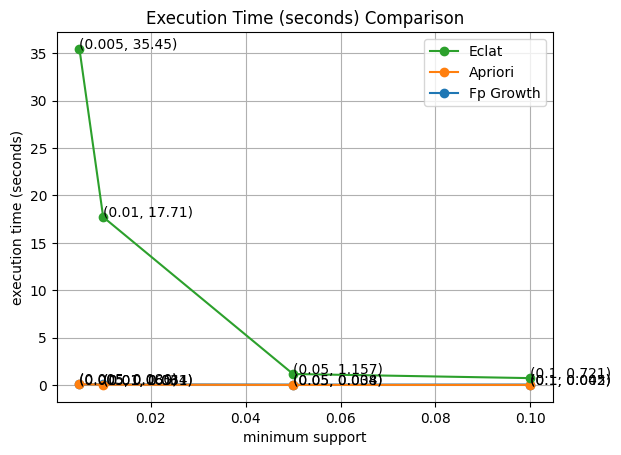

In [23]:
experiment_list=( 0.005, 0.01, 0.05, 0.1)
compare_time_exec_line_chart(experiment_list,algo1, algo2 , algo3)

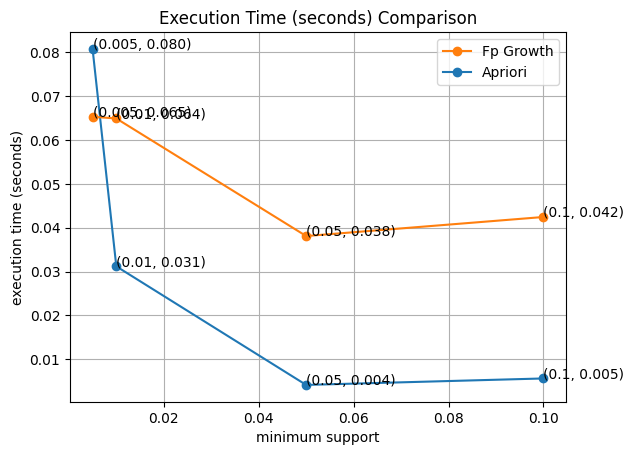

In [24]:
fig = plt.figure()

line2, = plt.plot(experiment_list, algo2[1], marker='o', label=algo2[0])
line1, = plt.plot(experiment_list, algo1[1], marker='o', label=algo1[0])
plt.legend(handles=[line1, line2])
for xy in zip(experiment_list,algo1[1]):
    plt.annotate('(%s, %.5s)' % xy, xy=xy, textcoords='data')

for xy in zip(experiment_list,algo2[1]):
    plt.annotate('(%s, %.5s)' % xy, xy=xy, textcoords='data')

plt.xlabel('minimum support')
plt.ylabel('execution time (seconds)')
plt.title("Execution Time (seconds) Comparison")
plt.grid()
plt.show()

## 6.8 

In [25]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

min_sup = 0.6
min_conf = 0.8


In [26]:
# Example transactions
transactions = [
    ["King’s-Crab", "Sunset-Milk", "Dairyland-Cheese", "Best-Bread"],
    ["Best-Cheese", "Dairyland-Milk", "Goldenfarm-Apple", "Tasty-Pie", "Wonder-Bread"],
    ["Westcoast-Apple", "Dairyland-Milk", "Wonder-Bread", "Tasty-Pie"],
    ["Wonder-Bread", "Sunset-Milk", "Dairyland-Cheese"]
]

# Initialize empty lists for item, brand, and category

items = []
brands = []
categories = []

# Split each item into item, brand, and category
for transaction in transactions:
    temp_items = []
    temp_brands = []
    temp_categories = []
    for item in transaction:
        item_parts = item.split("-")
        temp_items.append(item)
        temp_brands.append(item_parts[0])
        temp_categories.append(item_parts[1])
    items.append(temp_items)
    brands.append(temp_brands)
    categories.append(temp_categories)
# Create a dataframe from the split items
df2 = pd.DataFrame({'Item': items, 'Brand': brands, 'Category': categories})

# Print the dataframe
df2

,Item,Brand,Category
0,"[King’s-Crab, Sunset-Milk, Dairyland-Cheese, B...","[King’s, Sunset, Dairyland, Best]","[Crab, Milk, Cheese, Bread]"
1,"[Best-Cheese, Dairyland-Milk, Goldenfarm-Apple...","[Best, Dairyland, Goldenfarm, Tasty, Wonder]","[Cheese, Milk, Apple, Pie, Bread]"
2,"[Westcoast-Apple, Dairyland-Milk, Wonder-Bread...","[Westcoast, Dairyland, Wonder, Tasty]","[Apple, Milk, Bread, Pie]"
3,"[Wonder-Bread, Sunset-Milk, Dairyland-Cheese]","[Wonder, Sunset, Dairyland]","[Bread, Milk, Cheese]"


a . list the frequent k-itemset for largest k and association rules df follow by Category 

In [27]:
# Convert transactions to a binary encoded matrix
te = TransactionEncoder()
te_ary = te.fit_transform(df2['Category'])
category_encode = pd.DataFrame(te_ary, columns=te.columns_)
display(category_encode)

# Generate frequent itemsets
frequent_itemsets = apriori(category_encode, min_support=min_sup, use_colnames=True)


# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

# modified frequent partern display
frequent_itemsets['number_of_items'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(by=['number_of_items'], ascending=False).reset_index(drop=True)

# Print frequent k-itemsets
print("the largest frequent k-itemsets:")
display(frequent_itemsets.loc[[0]])


largest_k = frequent_itemsets["itemsets"][0]

#fiter all the strong association rules containing the frequent k-itemset for the largest k
largest_k_filter = association_rules_df[association_rules_df['antecedents'].apply(lambda x: x in largest_k )&
                                        association_rules_df['consequents'].apply(lambda x: x in largest_k)]
# Print association rules
print("Association Rules of the largest item in frequent itemsets :")
display(association_rules_df)

,Apple,Bread,Cheese,Crab,Milk,Pie
0,False,True,True,True,True,False
1,True,True,True,False,True,True
2,True,True,False,False,True,True
3,False,True,True,False,True,False


the largest frequent k-itemsets:


,support,itemsets,number_of_items
0,0.75,"(Cheese, Milk, Bread)",3


Association Rules of the largest item in frequent itemsets :


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Cheese),(Bread),0.75,1.0,0.75,1.0,1.0,0.0,inf,0.0
1,(Milk),(Bread),1.00,1.0,1.00,1.0,1.0,0.0,inf,0.0
2,(Bread),(Milk),1.00,1.0,1.00,1.0,1.0,0.0,inf,0.0
3,(Cheese),(Milk),0.75,1.0,0.75,1.0,1.0,0.0,inf,0.0
4,"(Cheese, Milk)",(Bread),0.75,1.0,0.75,1.0,1.0,0.0,inf,0.0
5,"(Cheese, Bread)",(Milk),0.75,1.0,0.75,1.0,1.0,0.0,inf,0.0
6,(Cheese),"(Milk, Bread)",0.75,1.0,0.75,1.0,1.0,0.0,inf,0.0


b . list the frequent k-itemset for largest k and association rules df follow by brand-item category 

In [28]:
# Convert transactions to a binary encoded matrix
te = TransactionEncoder()
te_ary = te.fit_transform(df2['Item'])
item_encode = pd.DataFrame(te_ary, columns=te.columns_)
display(item_encode)

# Generate frequent itemsets
frequent_itemsets = apriori(item_encode, min_support=min_sup, use_colnames=True)


# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

# modified frequent partern display
frequent_itemsets['number_of_items'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(by=['number_of_items'], ascending=False).reset_index(drop=True)

# Print frequent k-itemsets
print("the largest frequent k-itemsets:")
display(frequent_itemsets.loc[[0]])


,Best-Bread,Best-Cheese,Dairyland-Cheese,Dairyland-Milk,Goldenfarm-Apple,King’s-Crab,Sunset-Milk,Tasty-Pie,Westcoast-Apple,Wonder-Bread
0,True,False,True,False,False,True,True,False,False,False
1,False,True,False,True,True,False,False,True,False,True
2,False,False,False,True,False,False,False,True,True,True
3,False,False,True,False,False,False,True,False,False,True


the largest frequent k-itemsets:


,support,itemsets,number_of_items
0,0.75,(Wonder-Bread),1


## 6.13 Give a short example to show that items in a strong association rule actually may be negatively correlated.

Consider a dataset of customer transactions at a grocery store. Let's say we have two items: "Ice cream" and "Weight loss supplements."

Now, let's assume we discover a strong association rule with high support and confidence that states:
"If a customer buys Ice cream, they are likely to buy Weight loss supplements."

At first glance, this rule may seem counterintuitive because Ice cream and Weight loss supplements appear to be unrelated or even contradictory items. However, upon further analysis, we might realize that this association rule is capturing a negative correlation.

In this example, the negative correlation could be explained by the concept of compensatory behavior. It is possible that customers who indulge in buying Ice cream are more conscious of their health and weight, leading them to also purchase Weight loss supplements as a way to compensate for the indulgence.

Thus, despite the apparent contradiction between the items, the association rule reveals a negative correlation or compensatory behavior between the purchase of Ice cream and Weight loss supplements.

This example demonstrates that strong association rules can capture both positive and negative correlations between items, providing valuable insights into customer behavior and purchasing patterns.

## 6.14
<img src="image/6_14.png" style="width:460px;height:340px;">

### a) Suppose that the association rule “hot dogs ⇒ hamburgers” is mined. Given a minimum support threshold of 25% and a minimum confidence threshold of 50%, is this association rule strong?

>Support = (Transactions containing hot dogs and hamburgers) / Total transactions
>Confidence = (Transactions containing hot dogs and hamburgers) / Transactions containing hot dogs
>
>min_sup = 0.25 or 25%
>min_threshold = 0.5 or 50%
>
>1. Calculate the support and confidence for the given association rule:
>> - Support = 2000 / 5000 = 0.4 or 40%
>> - Confidence = 2000 / 3000 = 0.6667 or 66.67%
>
>2. Compare the support and confidence values to the minimum thresholds:
>
>> - The support of the association rule (40%) is higher than the minimum support threshold (25%), so it satisfies the support requirement.
>
>> - The confidence of the association rule (66.67%) is higher than the minimum confidence threshold (50%), so it satisfies the confidence requirement.
>
>Based on these calculations, we can conclude that the association rule "hot dogs ⇒ hamburgers" is strong according to the given minimum support and confidence thresholds.

### b) Based on the given data, is the purchase of hot dogs independent of the purchase of hamburgers? If not, what kind of correlation relationship exists between the two?

- (H0) The purchase of hot dogs is independent of the purchase of hamburgers. 
- (H1) The purchase of hot dogs is greatly dependent on the purchase of hamburgers.

In [45]:
import scipy.stats as stats

# Observed counts
observed = [[2000, 500], [1000, 1500]]

# Calculate expected counts assuming independence
row_totals = [2500, 2500]
col_totals = [3000, 2000]
expected = []
for i in range(2):
    row_expected = []
    for j in range(2):
        row_expected.append(row_totals[i] * col_totals[j] / 5000)
    expected.append(row_expected)

# Perform chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(observed)

print("Observation table")
display(pd.DataFrame(observed))
print("Expected table when assuming the purchase of hot dogs and hamburgers is independent")
display(pd.DataFrame(expected))

print("chi-square statistic = ",chi2)
print("p_value = ",p)
print()
# Compare observed counts with expected counts
if chi2 > 0 and p < 0.05:
    print("The purchase of hot dogs is greatly dependent on the purchase of hamburgers.")
    if observed[0][1] > expected[0][1]:
        print("There is a positive correlation between hot dogs and hamburgers.")
    else:
        print("There is a negative correlation between hot dogs and hamburgers.")
else:
    print("The purchase of hot dogs is independent of the purchase of hamburgers.")


Observation table


,0,1
0,2000,500
1,1000,1500


Expected table when assuming the purchase of hot dogs and hamburgers is independent


,0,1
0,1500.0,1000.0
1,1500.0,1000.0


chi-square statistic =  831.6675
p_value =  7.033015027797008e-183

The purchase of hot dogs is greatly dependent on the purchase of hamburgers.
There is a negative correlation between hot dogs and hamburgers.


In [50]:
from scipy.stats import chi2
# Observed counts
observed = np.array([[2000, 500], [1000, 1500]])

# Calculate expected counts assuming independence
row_totals = np.sum(observed, axis=1)
col_totals = np.sum(observed, axis=0)
total = np.sum(row_totals)
expected = np.outer(row_totals, col_totals) / total

display(expected)

# Calculate the chi-square statistic
chi2_statistic = np.sum((observed - expected)**2 / expected)

# Calculate the degrees of freedom
degrees_of_freedom = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_statistic, degrees_of_freedom)


print(chi2_statistic, degrees_of_freedom, p_value)

array([[1500., 1000.],
       [1500., 1000.]])

833.3333333333333 1 0.0


### c) Compare the use of the all confidence, max confidence, Kulczynski, and cosine measures with lift and correlation on the given data.

In [31]:
import numpy as np

# Create the contingency table
contingency_table = np.array([[2000, 500],
                             [1000, 1500]])

# Calculate all confidence
all_confidence = contingency_table[0, 0] / (contingency_table[0, 0] + contingency_table[0, 1])

# Calculate max confidence
max_confidence = max(contingency_table[0, 0] / (contingency_table[0, 0] + contingency_table[0, 1]),
                     contingency_table[1, 0] / (contingency_table[1, 0] + contingency_table[1, 1]))

# Calculate Kulczynski measure
kulczynski_measure = 0.5 * ((contingency_table[0, 0] / (contingency_table[0, 0] + contingency_table[0, 1])) +
                            (contingency_table[1, 0] / (contingency_table[1, 0] + contingency_table[1, 1])))

# Calculate Cosine measure
cosine_measure = contingency_table[0, 0] / np.sqrt((contingency_table[0, 0] + contingency_table[0, 1]) *
                                                   (contingency_table[0, 0] + contingency_table[1, 0]))

# Calculate Lift measure
lift_measure = (contingency_table[0, 0] / (contingency_table[0, 0] + contingency_table[0, 1])) / \
               ((contingency_table[0, 0] + contingency_table[1, 0]) / np.sum(contingency_table))

# Calculate Correlation measure
observed = contingency_table[0, 0] * contingency_table[1, 1] - contingency_table[0, 1] * contingency_table[1, 0]
expected = (contingency_table[0, 0] + contingency_table[0, 1]) * (contingency_table[0, 0] + contingency_table[1, 0]) * \
           (contingency_table[0, 1] + contingency_table[1, 1]) * (contingency_table[1, 0] + contingency_table[1, 1])
correlation_measure = observed / np.sqrt(expected)

# Print the results
print("All Confidence:", all_confidence)
print("Max Confidence:", max_confidence)
print("Kulczynski Measure:", kulczynski_measure)
print("Cosine Measure:", cosine_measure)
print("Lift Measure:", lift_measure)
print("Correlation Measure:", correlation_measure)

All Confidence: 0.8
Max Confidence: 0.8
Kulczynski Measure: 0.6000000000000001
Cosine Measure: 0.7302967433402214
Lift Measure: 1.3333333333333335
Correlation Measure: 0.408248290463863
